In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
####
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN

In [3]:
df = pd.read_csv('export_dataframe.csv')
df[' school.mooe '] = df[' school.mooe '].str.replace(',', '').astype(float)
df = df[df['school.classification'] == 'Elementary']
# note try to filter out the SPED SCHOOLS and SPED Student for a more general approach, may possibly cause noise on the data set

C:\Users\theki\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.columns

Index(['School ID', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Female', 'SPED NG Male',
       'SPED NG Female', 'Grade 7 Male', 'Grade 7 Female', 'Grade 8 Male',
       'Grade 8 Female', 'Grade 9 Male', 'Grade 9 Female', 'Grade 10 Male',
       'Grade 10 Female', 'Grade 11 Male', 'Grade 11 Female', 'Grade 12 Male',
       'Grade 12 Female', 'school.id', 'school.name_x', 'school.region',
       'school.region.name', 'school.province', 'school.cityhall',
       'school.division', 'school.citymuni', 'school.district',
       'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.

In [5]:
df_1 = df[['School ID', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Female', 'SPED NG Male',
       'SPED NG Female']]

In [6]:
df_1['total_stud'] = df_1['Kinder Male'] + df_1['Kinder Female'] + df_1['Grade 1 Male'] + df_1['Grade 1 Female'] + df_1['Grade 2 Male'] + df_1['Grade 2 Female'] + df_1['Grade 3 Male'] + df_1['Grade 3 Female'] + df_1['Grade 4 Male'] + df_1['Grade 4 Female'] + df_1['Grade 5 Male'] + df_1['Grade 5 Female'] + df_1['Grade 6 Male'] + df_1['Grade 6 Female'] + df_1['SPED NG Male'] + df_1['SPED NG Female']
df_tot_stud = df_1['total_stud']
df_tot_stud

<ipython-input-6-d70e700ca2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['total_stud'] = df_1['Kinder Male'] + df_1['Kinder Female'] + df_1['Grade 1 Male'] + df_1['Grade 1 Female'] + df_1['Grade 2 Male'] + df_1['Grade 2 Female'] + df_1['Grade 3 Male'] + df_1['Grade 3 Female'] + df_1['Grade 4 Male'] + df_1['Grade 4 Female'] + df_1['Grade 5 Male'] + df_1['Grade 5 Female'] + df_1['Grade 6 Male'] + df_1['Grade 6 Female'] + df_1['SPED NG Male'] + df_1['SPED NG Female']


0          90.0
1         456.0
2         167.0
3         122.0
4          77.0
          ...  
38643    1738.0
38644    1107.0
38645    2196.0
38646    5601.0
38647    1175.0
Name: total_stud, Length: 38618, dtype: float64

In [7]:
df_2 = df[['School ID','teachers.instructor','teachers.mobile','teachers.regular','teachers.sped']]
df_2['total_inst'] = (df_2['teachers.instructor'] + df_2['teachers.mobile'] + df_2['teachers.regular'] + df_2['teachers.sped'])
df_total_inst = df_2['total_inst']

<ipython-input-7-25170418af35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['total_inst'] = (df_2['teachers.instructor'] + df_2['teachers.mobile'] + df_2['teachers.regular'] + df_2['teachers.sped'])


In [8]:
df_3 = df[['rooms.standard.academic','rooms.standard.unused','rooms.nonstandard.academic','rooms.nonstandard.unused']]

df_3["rooms_total"] = (df['rooms.standard.academic'] + 
                             df['rooms.standard.unused'] + 
                             df['rooms.nonstandard.academic'] + 
                             df['rooms.nonstandard.unused'])

df_rooms_total = df_3['rooms_total']

<ipython-input-8-50f4e99b4986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["rooms_total"] = (df['rooms.standard.academic'] +


In [9]:
df_4 = df[['school.region',' school.mooe ','school.urban']]

In [10]:
final_df = pd.concat([df_tot_stud, df_total_inst, df_rooms_total, df_4], axis = 1)

In [11]:
final_df = final_df.dropna()

In [12]:
final_df.head()

,total_stud,total_inst,rooms_total,school.region,school.mooe,school.urban
0,90.0,2.0,2.0,Region I,84000.0,Partially Urban
1,456.0,17.0,12.0,Region I,268000.0,Partially Urban
2,167.0,7.0,6.0,Region I,135000.0,Partially Urban
3,122.0,7.0,6.0,Region I,116000.0,Partially Urban
4,77.0,7.0,6.0,Region I,115000.0,Partially Urban


In [13]:
final_df.shape

(36035, 6)

In [14]:
final_df.groupby('school.region').count().sum()

total_stud       36035
total_inst       36035
rooms_total      36035
 school.mooe     36035
school.urban     36035
dtype: int64

In [15]:
final_df['school.urban'].unique()

array(['Partially Urban', 'Urban', 'Rural'], dtype=object)

In [16]:
final_df['comp.mooe'] = 3000*final_df['rooms_total'] + 4000*final_df['total_inst'] + 200*final_df['total_stud'] + 40000

In [17]:
Q1 = final_df[' school.mooe '].quantile(0.25)
Q3 = final_df[' school.mooe '].quantile(0.75)
IQR = Q3 - Q1
final_df = (final_df[(final_df[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (final_df[' school.mooe '] <= Q3 + 1.5*IQR)])
final_df = final_df.dropna()
final_df = final_df.reset_index()
final_df

,index,total_stud,total_inst,rooms_total,school.region,school.mooe,school.urban,comp.mooe
0,0,90.0,2.0,2.0,Region I,84000.0,Partially Urban,72000.0
1,1,456.0,17.0,12.0,Region I,268000.0,Partially Urban,235200.0
2,2,167.0,7.0,6.0,Region I,135000.0,Partially Urban,119400.0
3,3,122.0,7.0,6.0,Region I,116000.0,Partially Urban,110400.0
4,4,77.0,7.0,6.0,Region I,115000.0,Partially Urban,101400.0
...,...,...,...,...,...,...,...,...
32609,38602,522.0,15.0,11.0,NCR,266000.0,Urban,237400.0
32610,38603,439.0,18.0,10.0,NCR,269000.0,Urban,229800.0
32611,38624,140.0,23.0,6.0,NCR,174000.0,Urban,178000.0
32612,38625,62.0,8.0,9.0,NCR,128000.0,Urban,111400.0


In [18]:
final_df.shape

(32614, 8)

In [19]:
#final_df1 = final_df.copy()

In [20]:
#final_df1 = final_df1[['total_stud','total_inst','rooms_total',' school.mooe ', 'comp.mooe']].dropna()
#final_df1.to_csv('clean_df.csv')

# Clean data frame

In [21]:
model_df = final_df.copy()

# Encoding

In [22]:
#model_df['school.cityclass'].unique()

In [23]:
#cc_labels = {'Component City': 0, 'Independent City': 1, 'Highly Urbanized City': 2}
#model_df['school.cityclass'] = model_df['school.cityclass'].map(cc_labels)

In [24]:
#model_df

In [25]:
model_df['school.urban'].unique()

array(['Partially Urban', 'Urban', 'Rural'], dtype=object)

In [26]:
urb_labels = {'Partially Urban': 1, 'Urban': 0, 'Rural': 2}
model_df['school.urban'] = model_df['school.urban'].map(urb_labels)

# Modelling with PCA

In [27]:
#model_df_1 = model_df[['total_stud','total_inst','rooms_total',' school.mooe ','school.cityclass','school.urban']].reset_index()
model_df_1 = model_df[['total_stud','total_inst','rooms_total',' school.mooe ','school.urban']]
model_df_1.isna().sum()

total_stud       0
total_inst       0
rooms_total      0
 school.mooe     0
school.urban     0
dtype: int64

In [28]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(model_df_1)

In [29]:
model_df_pca = PCA(n_components = 2).fit_transform(scaled_df)

In [30]:
# Kmeans clustering
#kmodel1 = KMeans(n_clusters = 4, random_state = 42, init = 'random').fit(model_df_pca)
#pred_label_1 = kmodel1.predict(model_df_pca)

In [31]:
# DBSCAN
kmodel1 = DBSCAN(min_samples = 3).fit(model_df_pca)
pred_label_1 = kmodel1.labels_

In [32]:
pred_label_df = pd.DataFrame(pred_label_1, columns = ['labels'])
model_df_pca_df = pd.DataFrame(model_df_pca, columns = ['PCA1', 'PCA2'])

In [33]:
gr_model = pd.concat([model_df_pca_df, pred_label_df], axis = 1)
gr_model['labels'].value_counts()

 0    29511
 2     1685
 1     1414
-1        4
Name: labels, dtype: int64

C:\Users\theki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\theki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\theki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\theki\anacond

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

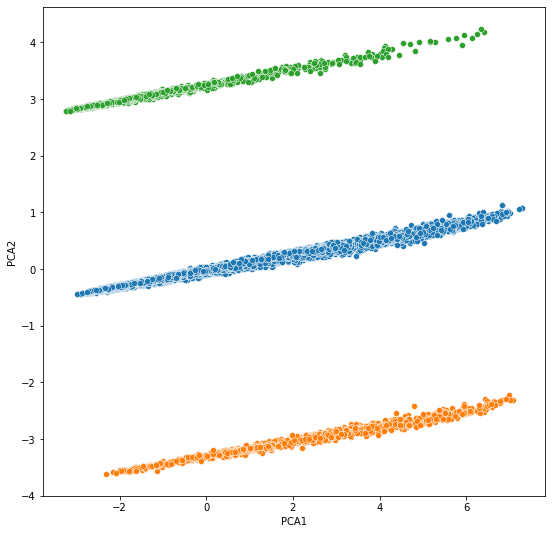

In [34]:
clusterp_0 = gr_model[gr_model['labels'] == 0]
clusterp_1 = gr_model[gr_model['labels'] == 1]
clusterp_2 = gr_model[gr_model['labels'] == 2]
clusterp_3 = gr_model[gr_model['labels'] == 3]

plt.figure(figsize = (9,9))
sns.scatterplot(clusterp_0['PCA1'], clusterp_0['PCA2'])
sns.scatterplot(clusterp_1['PCA1'], clusterp_1['PCA2'])
sns.scatterplot(clusterp_2['PCA1'], clusterp_2['PCA2'])
sns.scatterplot(clusterp_3['PCA1'], clusterp_3['PCA2'])

In [35]:
print(len(clusterp_0), len(clusterp_1), len(clusterp_2), len(clusterp_3))

29511 1414 1685 0


In [36]:
num_cluster = np.arange(2,10)
inertia_list = []
for i in num_cluster:
    kmodel_loop = KMeans(n_clusters = i).fit(model_df_pca)
    inertia_list.append(kmodel_loop.inertia_)
    
inertia_list

[69206.07943897118,
 50267.63580526488,
 35678.728140854495,
 25839.20907931088,
 18189.779215860053,
 14480.228756802415,
 11276.970239814276,
 9553.879977900153]

C:\Users\theki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

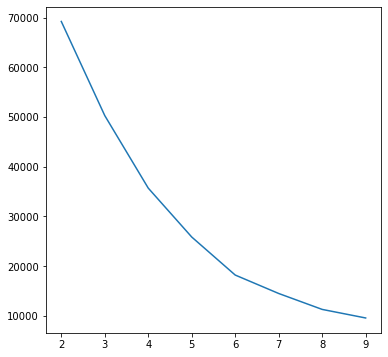

In [37]:
plt.figure(figsize = (6,6))
sns.lineplot(num_cluster, inertia_list)

In [38]:
sil = silhouette_score(model_df_pca, pred_label_1)
sil

0.47408265167895713

In [39]:
model_df_1

,total_stud,total_inst,rooms_total,school.mooe,school.urban
0,90.0,2.0,2.0,84000.0,1
1,456.0,17.0,12.0,268000.0,1
2,167.0,7.0,6.0,135000.0,1
3,122.0,7.0,6.0,116000.0,1
4,77.0,7.0,6.0,115000.0,1
...,...,...,...,...,...
32609,522.0,15.0,11.0,266000.0,0
32610,439.0,18.0,10.0,269000.0,0
32611,140.0,23.0,6.0,174000.0,0
32612,62.0,8.0,9.0,128000.0,0


In [40]:
labeled_df = pd.concat([model_df_1, pred_label_df], axis = 'columns')
labeled_df['comp.mooe'] = 3000*labeled_df['rooms_total'] + 4000*labeled_df['total_inst'] + 200*labeled_df['total_stud'] + 40000
labeled_df

,total_stud,total_inst,rooms_total,school.mooe,school.urban,labels,comp.mooe
0,90.0,2.0,2.0,84000.0,1,0,72000.0
1,456.0,17.0,12.0,268000.0,1,0,235200.0
2,167.0,7.0,6.0,135000.0,1,0,119400.0
3,122.0,7.0,6.0,116000.0,1,0,110400.0
4,77.0,7.0,6.0,115000.0,1,0,101400.0
...,...,...,...,...,...,...,...
32609,522.0,15.0,11.0,266000.0,0,1,237400.0
32610,439.0,18.0,10.0,269000.0,0,1,229800.0
32611,140.0,23.0,6.0,174000.0,0,1,178000.0
32612,62.0,8.0,9.0,128000.0,0,1,111400.0


In [41]:
labeled_df['perc_diff'] = (labeled_df[' school.mooe '] - labeled_df['comp.mooe'])/labeled_df['comp.mooe'] * 100

In [42]:
np.mean(labeled_df['perc_diff'])

11.839220943930785

# 'Urban': 0, 'Partially Urban': 1, 'Rural': 2

# Cluster 0 - Partially Urban

In [43]:
cluster_0 = labeled_df[labeled_df['labels'] == 0]

In [44]:
print('C0: mean: {}; min: {}, max: {}, median: {}'.format(np.mean(cluster_0['perc_diff']), np.min(cluster_0['perc_diff']), np.max(cluster_0['perc_diff']), np.median(cluster_0['perc_diff'])))
# urb_labels = {'Partially Urban': 0, 'Urban': 1, 'Rural': 2}

C0: mean: 11.778255774179923; min: -40.557065217391305, max: 98.71794871794873, median: 11.282843894899536


In [45]:
cluster_0['school.urban'].value_counts()

1    29511
Name: school.urban, dtype: int64

In [46]:
c0_mean = np.mean(cluster_0['perc_diff'])
c0_std = np.std(cluster_0['perc_diff'])

C:\Users\theki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perc_diff', ylabel='Density'>

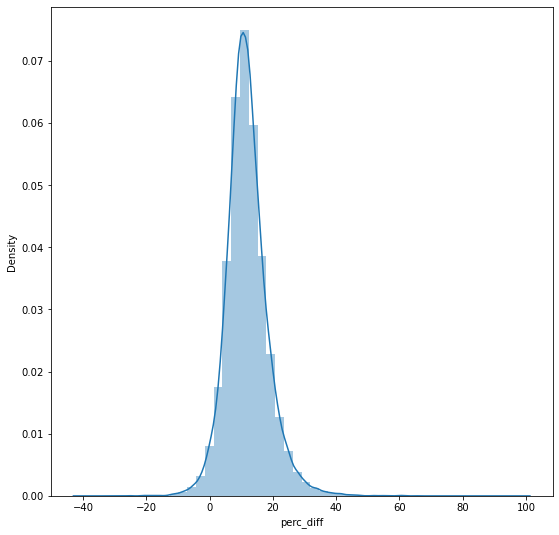

In [47]:
plt.figure(figsize = (9,9))
sns.distplot(cluster_0['perc_diff'])

# Cluster 1 - Urban

In [48]:
cluster_1 = labeled_df[labeled_df['labels'] == 1]

In [49]:
print('C1: mean: {}; min: {}, max: {}, median: {}'.format(np.mean(cluster_1['perc_diff']), np.min(cluster_1['perc_diff']), np.max(cluster_1['perc_diff']), np.median(cluster_1['perc_diff'])))
# urb_labels = {'Partially Urban': 0, 'Urban': 1, 'Rural': 2}

C1: mean: 12.815839458442468; min: -40.10416666666667, max: 35.374697824335215, median: 12.77502735805379


In [50]:
cluster_1['school.urban'].value_counts()

0    1414
Name: school.urban, dtype: int64

C:\Users\theki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perc_diff', ylabel='Density'>

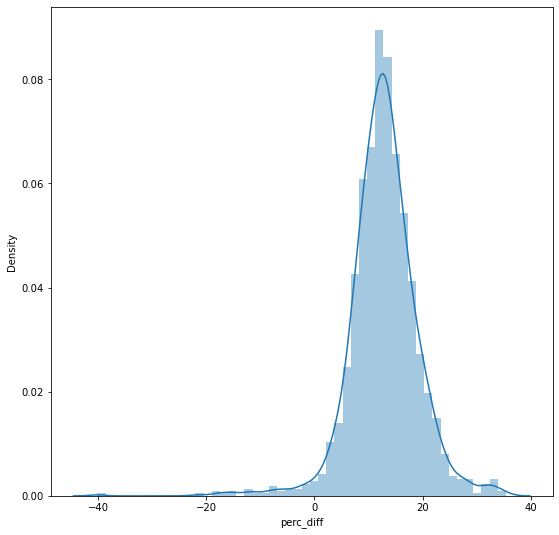

In [51]:
plt.figure(figsize = (9,9))
sns.distplot(cluster_1['perc_diff'])

# Cluster 2 - Rural

In [52]:
cluster_2 = labeled_df[labeled_df['labels'] == 2]

In [53]:
print('C2: mean: {}; min: {}, max: {}, median: {}'.format(np.mean(cluster_2['perc_diff']), np.min(cluster_2['perc_diff']), np.max(cluster_2['perc_diff']), np.median(cluster_2['perc_diff'])))
# urb_labels = {'Partially Urban': 0, 'Urban': 1, 'Rural': 2}

C2: mean: 12.122716552140643; min: -17.637271214642265, max: 67.04545454545455, median: 11.29032258064516


In [54]:
cluster_2['school.urban'].value_counts()

2    1685
Name: school.urban, dtype: int64

C:\Users\theki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perc_diff', ylabel='Density'>

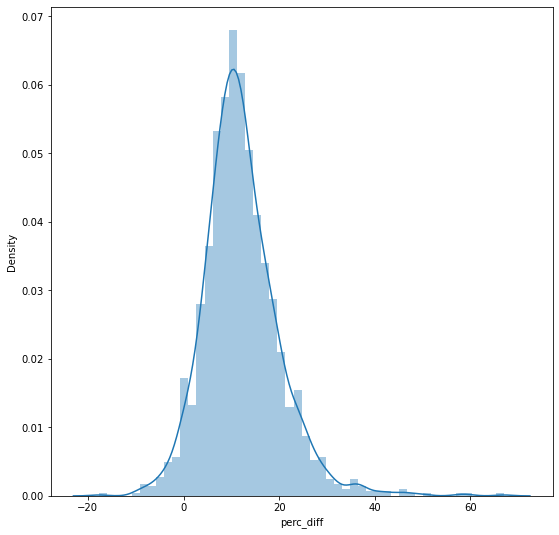

In [55]:
plt.figure(figsize = (9,9))
sns.distplot(cluster_2['perc_diff'])